## BASIC IMPORTS

In [1]:
from sklearn.neighbors import KNeighborsRegressor

In [1]:
train1=pd.read_csv('train.csv')
test1=pd.read_csv('test.csv')
pd.set_option("max_rows",None)
train1.sort_index(inplace=True, axis=1)
test1.sort_index(inplace=True, axis=1)

In [2]:
train1.shape, test1.shape

((1460, 81), (1459, 80))

In [3]:
train2=train1.copy()

In [4]:
train2.drop('SalePrice',inplace=True,axis=1)

In [5]:
train2.shape

(1460, 80)

In [6]:
full=pd.concat([train2,test1],axis=0)

In [7]:
full.reset_index()

,index,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,0,856,854,0,NaN,3,1Fam,TA,No,706.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,3,961,756,0,NaN,3,1Fam,Gd,No,216.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1454,546,546,0,NaN,3,Twnhs,TA,No,0.0,...,WD,0,Pave,5,546.0,AllPub,0,1970,1970,2006
2915,1455,546,546,0,NaN,3,TwnhsE,TA,No,252.0,...,WD,0,Pave,6,546.0,AllPub,0,1970,1970,2006
2916,1456,1224,0,0,NaN,4,1Fam,TA,No,1224.0,...,WD,0,Pave,7,1224.0,AllPub,474,1960,1996,2006
2917,1457,970,0,0,NaN,3,1Fam,TA,Av,337.0,...,WD,0,Pave,6,912.0,AllPub,80,1992,1992,2006


In [8]:
full.drop('Id',axis=1,inplace=True)

In [9]:
full

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,546,546,0,NaN,3,Twnhs,TA,No,0.0,0.0,...,WD,0,Pave,5,546.0,AllPub,0,1970,1970,2006
1455,546,546,0,NaN,3,TwnhsE,TA,No,252.0,0.0,...,WD,0,Pave,6,546.0,AllPub,0,1970,1970,2006
1456,1224,0,0,NaN,4,1Fam,TA,No,1224.0,0.0,...,WD,0,Pave,7,1224.0,AllPub,474,1960,1996,2006
1457,970,0,0,NaN,3,1Fam,TA,Av,337.0,0.0,...,WD,0,Pave,6,912.0,AllPub,80,1992,1992,2006


## PREPROCESSING

In [10]:
def check_null_cols(df):
    null_cols=list()
    for i in df.columns:
        if(df[i].isna().sum()>0):
            null_cols.append(i)
    return null_cols

In [11]:
def check_obj_categ(df):
    obj_cols=list()
    for i in df.columns:
        if df[i].dtypes=='O':
            obj_cols.append(i)
    return obj_cols

In [12]:
def check_numerical(df):
    num_cols=full.select_dtypes(np.number).columns
    return num_cols

In [13]:
cols_null=check_null_cols(full)
cols_obj=check_obj_categ(full)
cols_num=check_numerical(full)

<IPython.core.display.Javascript object>

## FILL MISSING

In [14]:
missin_obj=list(set(cols_null) & set(cols_obj))
missin_num=list(set(cols_null) & set(cols_num))

In [15]:
full.isna().sum().sum()

13965

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

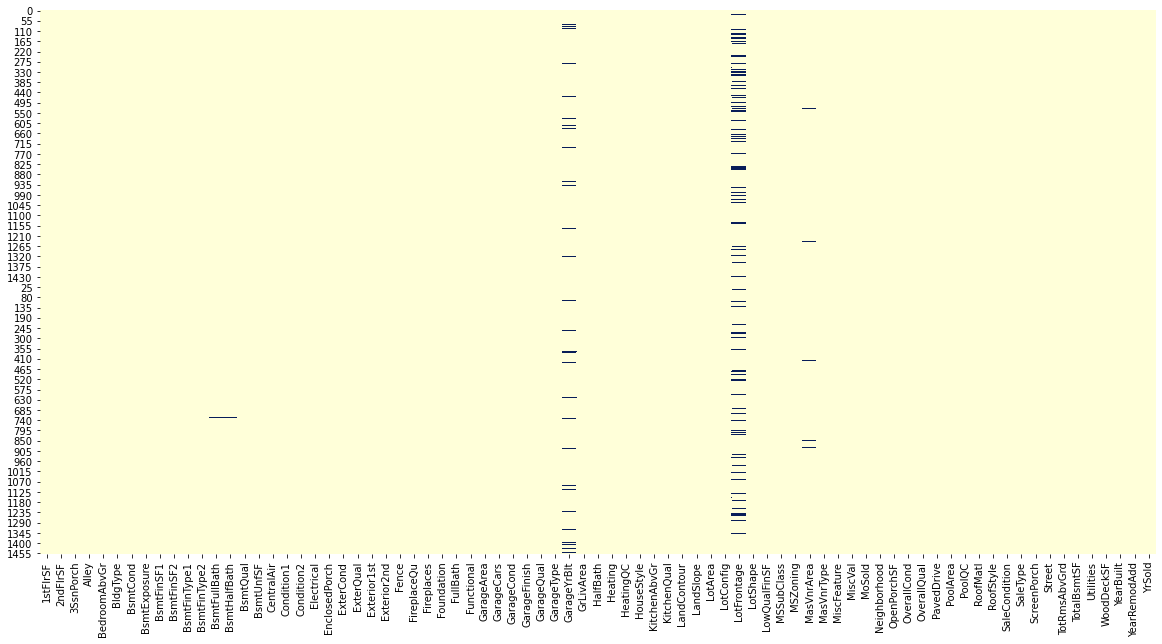

In [22]:
plt.figure(figsize=[20,10])
sns.heatmap(full.isna(), cmap='YlGnBu', cbar=False)

In [17]:
for i in ['Alley',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PoolQC',
    'Fence',
    'MiscFeature']:
    full[i]=full[i].fillna('None')
    
for i in ['MSZoning',
    'Utilities',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'Electrical',
    'KitchenQual',
    'Functional',
    'SaleType']:
    full[i]=full[i].fillna(full[i].mode()[0])
    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

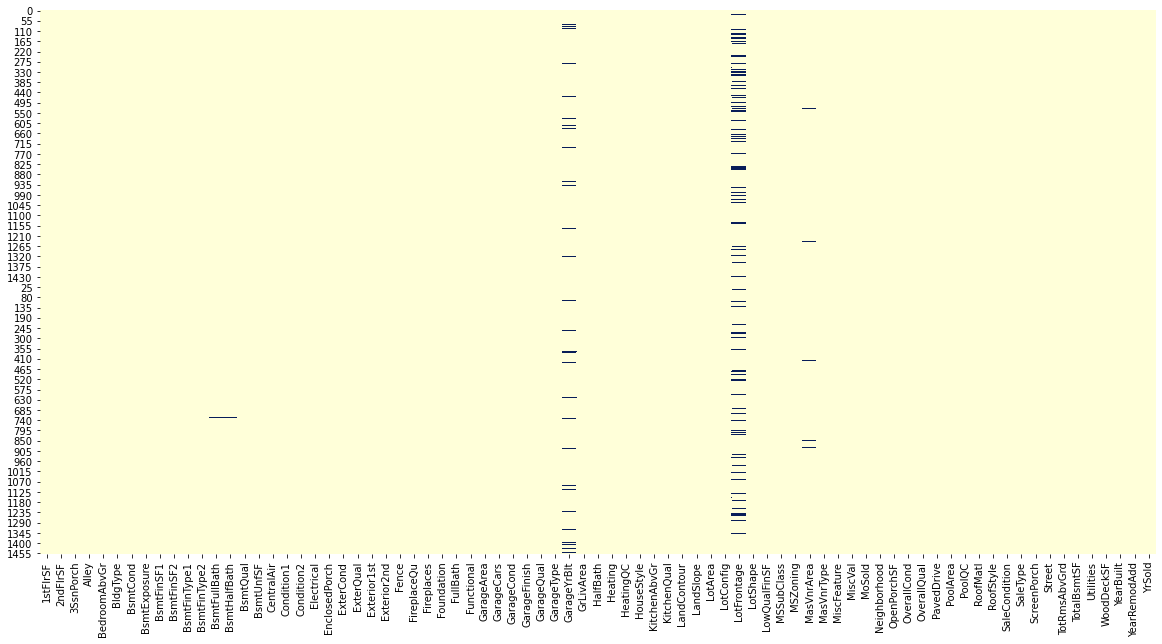

In [23]:
plt.figure(figsize=[20,10])
sns.heatmap(full.isna(), cmap='YlGnBu', cbar=False)

In [19]:
full.isna().sum().sum()

678

In [49]:
temp=[i for i in full.columns if full[i].isna().sum()>0]

In [109]:
full2=full.copy()

In [110]:
def fill_with_knn(cols):
    numeric_df = full.select_dtypes(np.number)
    non_na_columns = numeric_df.loc[: ,numeric_df.isna().sum() == 0].columns
    temp_X=numeric_df.loc[numeric_df[cols].isna()==False, non_na_columns]
    temp_y=numeric_df.loc[numeric_df[cols].isna()==False, cols]
    temp_testx=numeric_df.loc[numeric_df[cols].isna()==True, non_na_columns]
    KNN_Reg=KNeighborsRegressor()
    KNN_Reg.fit(temp_X,temp_y)
    full2.loc[full2[cols].isna()==True, cols]=KNN_Reg.predict(temp_testx)
    

In [111]:
for i in temp:
    fill_with_knn(i)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [112]:
full2.isna().sum().sum()

0

## SPLIT

In [113]:
target=train1['SalePrice']

In [144]:
dummy_list=list()
for i in cols_obj:
    if len(full2[i].unique())<9:
        dummy_list.append(i)

In [145]:
ff=full2.copy()

In [146]:
full4=pd.get_dummies(ff)

In [147]:
pd.set_option("max_columns",None)

In [239]:
full4['YearBuilt']=np.abs(full4['YearBuilt']-full4['YrSold'])

<IPython.core.display.Javascript object>

In [240]:
full4.drop('YrSold',axis=1,inplace=True)

## SCALE

In [241]:
log_target=np.log1p(target)
fullq=np.log1p(full4)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [242]:
full5=fullq.copy()

In [243]:
import scipy.stats
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(full5)

full5 = pd.DataFrame(scaler.transform(full5), index=full5.index, columns=full5.columns)

In [244]:
fullA=full5.iloc[0:1460,:]
fullB=full5.iloc[1460:,:]

In [245]:
test_ids=fullB.index

## MODEL FIT

In [246]:
from sklearn.linear_model import BayesianRidge, HuberRegressor, Ridge, OrthogonalMatchingPursuit
from sklearn.ensemble import GradientBoostingRegressor

In [247]:
rig=Ridge(alpha=631.1412445239156)
b=BayesianRidge()
hb=HuberRegressor()
om=OrthogonalMatchingPursuit()

In [248]:
resultrig = np.exp(np.sqrt(-cross_val_score(rig, fullA, log_target, scoring='neg_mean_squared_error')))
resultrig.mean()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1.1424945042276604

In [249]:
resultb = np.exp(np.sqrt(-cross_val_score(b, fullA, log_target, scoring='neg_mean_squared_error')))
resultb.mean()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1.1437502565810462

In [250]:
resulthb = np.exp(np.sqrt(-cross_val_score(hb, fullA, log_target, scoring='neg_mean_squared_error')))
resulthb.mean()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

c:\users\bharath srinivasan\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\bharath srinivasan\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\bharath srinivasan\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_huber.py:296

11.4882270739473

In [251]:
resulthom = np.exp(np.sqrt(-cross_val_score(om, fullA, log_target, scoring='neg_mean_squared_error')))
resulthom.mean()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1.1432293152401742

In [252]:
rig.fit(fullA,log_target)
b.fit(fullA,log_target)
hb.fit(fullA,log_target)
om.fit(fullA,log_target)

c:\users\bharath srinivasan\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


OrthogonalMatchingPursuit()

In [253]:
moded=(0.4*rig.predict(fullB)+
0.3*b.predict(fullB)+
0.1*hb.predict(fullB)+
0.2*om.predict(fullB))

In [254]:
submission = pd.concat([pd.Series(test_ids+1461, name='Id'), pd.Series(np.exp(moded), name='SalePrice')], axis=1)
submission.to_csv('./submission.csv', index=False, header=True)

<IPython.core.display.Javascript object>

## POST-SUBMISSION IMPRV

In [234]:
yr=[]
for i in full2.columns:
    if i.startswith('Y') or i.startswith('y'):
        yr.append(i)
yr

['YearBuilt', 'YearRemodAdd', 'YrSold']

<IPython.core.display.Javascript object>

c:\users\bharath srinivasan\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

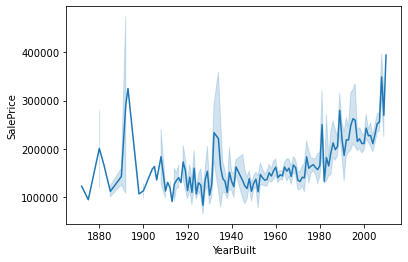

In [236]:
sns.lineplot(train1['YearBuilt'],train1['SalePrice'])

<IPython.core.display.Javascript object>

c:\users\bharath srinivasan\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

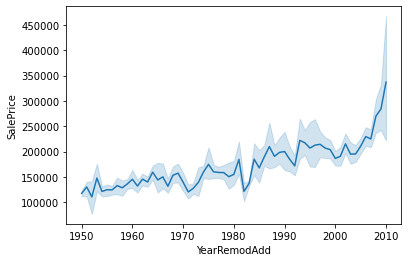

In [237]:
sns.lineplot(train1['YearRemodAdd'],train1['SalePrice'])

<IPython.core.display.Javascript object>

c:\users\bharath srinivasan\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

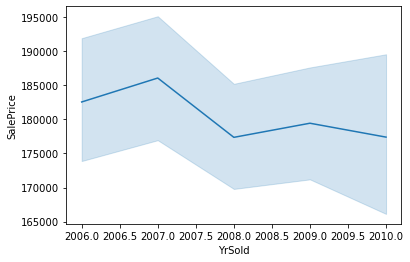

In [238]:
sns.lineplot(train1['YrSold'],train1['SalePrice'])